# Training

### import modules

In [1]:
import os

from sklearn import preprocessing
from nilearn import image, datasets, input_data, plotting

import pandas as pd

import urllib
import zipfile

import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

In [2]:
imgList = ['../train/%s'%x for x in os.listdir('../train/')]; imgList.sort()

In [3]:
imgList[-5:]

['../train/spatial_026_church.nii.gz',
 '../train/spatial_032_basement.nii.gz',
 '../train/spatial_038_promenade.nii.gz',
 '../train/spatial_041_cityofkiel.nii.gz',
 '../train/spatial_049_univesity.nii.gz']

### Wir extrahieren wieder die Daten aus den Bildern und glätten dabei mit 8mm

In [4]:
rawMasker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz').fit()

In [5]:
rawMasker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
      mask_strategy='background', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=False, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

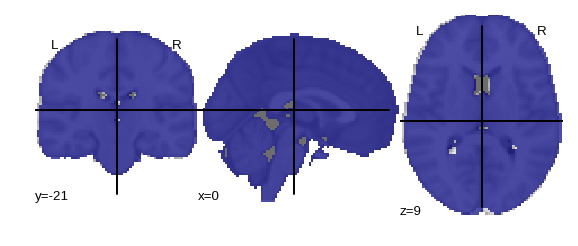

In [6]:
plotting.plot_roi(rawMasker.mask_img_);

### Wir packen alle Daten in eine Tabelle

In [7]:
def makeBigDf(imgList,masker):
    bigDf = pd.DataFrame()
    for img in imgList:
        thisName = img.split('/')[-1].split('.')[0]
        cond,num,content = thisName.split('_')
        cont = '%s-%s' % (num,content)
        thisDf = pd.DataFrame(masker.transform(img))
        thisDf.index = [[cond],[cont]]
        bigDf = pd.concat([bigDf,thisDf])
        
    stdDf = pd.DataFrame(preprocessing.scale(bigDf),index=bigDf.index)
    stdDf.sort_index(inplace=True)
    
    return stdDf

In [8]:
blockDf = makeBigDf(imgList,rawMasker)

In [9]:
blockDf

0         1         2         3         4       \
faces    004-family       -0.893057 -0.716411 -1.268387 -1.037058 -1.043324   
         007-friends       1.067880  1.158410  0.029444  0.294129  0.766959   
         013-movieactors  -2.122688 -2.086964  0.869528 -0.751756 -1.305097   
         016-athletes      1.093218  1.010220  1.016510  0.567120  0.893789   
         024-tvactors      0.340714 -0.077865 -0.614202  0.087577 -0.113487   
         029-politicians   0.904376  0.318414 -0.266150  1.190697  0.993877   
         033-lectureres    0.729766  0.373744 -0.223356 -0.716910 -0.350333   
         036-teachers     -1.154463 -0.686617  2.339601 -2.077763 -1.623898   
         042-family        0.017322  0.287067  0.825980  0.796005  0.895493   
         047-friends      -0.355770 -0.552249  0.060382 -0.061384 -0.339881   
language 002-animals       0.990026  1.006376  0.569711  0.651518  0.994975   
         006-tools         0.205838  0.456092 -0.520003 -0.754528 -0.405494   
         012-cities       -0.639485 -0.814193  0.845824  0.352571 -0.102178   
         018-countries    -0.412745 -0.406860 -1.343995 -1.083264 -1.018945   
         021-occupations   0.222418 -0.068327  0.110869  0.740199  0.245864   
         028-fruits       -0.911125 -1.128605 -2.771705 -0.257576 -1.191887   
         034-clothing     -1.076489 -1.610053 -0.492563  0.090959 -0.847047   
         039-vegetables   -0.378705  0.322620  0.192332 -0.332451 -0.063492   
         044-furniture    -0.096625  0.476372 -0.181865 -0.097313  0.073757   
         048-colors        0.205217 -0.627518 -1.606867 -0.325719 -0.875148   
motor    005-badminton     0.609549  0.572071  0.475901 -0.406034  0.188419   
         010-tennis        0.848350  0.471386 -0.907792  1.923769  1.151255   
         015-swimming     -1.085497 -1.019910 -0.615224 -0.482341 -0.774439   
         020-soccer       -0.967336 -1.153134 -0.827638 -0.364923 -0.875351   
         025-highjump      0.080827  0.445775 -0.469348 -0.761016 -0.260679   
         030-climbing      0.049068  0.745867 -0.782261 -1.443258 -0.543180   
         035-huerdlerace  -1.239064 -0.832745  0.371177 -1.251652 -1.231043   
         040-archery       0.006991 -0.215166  1.043344 -0.971171 -0.745822   
         045-ropeskipping  1.681935  1.136913  0.478344  1.427260  1.694839   
         050-juggling      2.751292  2.524449 -0.994807  2.342300  2.786203   
rest     001-rest          1.007467  0.936000 -1.195961  0.450490  0.576294   
         009-rest          0.551353  0.417456  0.734553  0.513552  0.568875   
         014-rest         -0.266760 -0.197621  1.430818  1.648094  0.890246   
         019-rest         -0.978985 -0.967714  0.424359  0.443860 -0.219439   
         023-rest          2.105956  2.440855  0.316239  0.700509  1.777468   
         027-rest         -0.349313 -0.641870 -0.090041  1.053138  0.444342   
         031-rest          0.339101  0.255469  0.298585  0.208867  0.261791   
         037-rest          0.808275  1.738735  1.690623 -0.910127  0.496542   
         043-rest          0.065529  0.588482  1.747725 -0.315737  0.388506   
         046-rest         -1.412786 -1.286786  0.921892 -0.588124 -0.894386   
spatial  003-citysquare   -1.084546 -0.938755  0.485730 -0.350233 -0.595146   
         008-market       -1.390525 -1.453669  0.882949 -0.487759 -0.891557   
         011-tramstation   0.068504  0.423486 -1.145779 -0.706627 -0.273624   
         017-trainstation -0.152944 -0.167775  0.274714 -0.527977 -0.295173   
         022-school        0.211163  0.340782  0.301221 -0.569795 -0.029847   
         026-church        1.921281  1.570985  0.320413  3.048435  2.976000   
         032-basement     -0.223829 -0.501385 -1.291225 -0.329314 -0.763108   
         038-promenade     0.456491  0.486267 -0.492076  0.110185  0.284152   
         041-cityofkiel   -1.892156 -1.630061  1.058132 -1.678614 -1.790388   
         049-univesity    -0.255013 -0.722039 -2.015657  0.999191  0.113745   


In [10]:
meanBlockDf = blockDf.groupby(level=0).mean()

In [11]:
meanBlockDf

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
faces,-0.037270,-0.097225,0.276935,-0.170934,-0.122590,-0.110010,-0.202840,-0.056391,0.163021,-0.320269,...,0.015612,-0.107932,0.229244,0.223038,0.118473,-0.065864,0.152986,0.193395,0.231066,-0.340674
language,-0.189168,-0.239410,-0.519826,-0.101560,-0.318960,-0.244438,-0.071666,-0.363202,0.040128,0.790361,...,-0.130825,-0.034869,0.251968,0.266692,-0.157475,-0.796432,0.345850,0.220209,-0.395480,0.320374
motor,0.273612,0.267551,-0.222830,0.001293,0.139020,-0.035321,-0.051137,0.040910,-0.146478,-0.290502,...,-0.071281,0.105423,-0.278932,-0.323045,-0.145098,0.083807,-0.380218,-0.302108,0.212609,-0.076491
rest,0.186984,0.328301,0.627879,0.320452,0.429024,0.269389,0.334902,0.280552,-0.245961,-0.326972,...,0.328734,0.196928,0.011455,0.017971,0.148903,0.370595,0.037519,0.021476,-0.182839,0.116597
spatial,-0.234157,-0.259216,-0.162158,-0.049251,-0.126495,0.120381,-0.009259,0.098131,0.189290,0.147382,...,-0.142240,-0.159550,-0.213735,-0.184655,0.035196,0.407894,-0.156138,-0.132972,0.134644,-0.019806


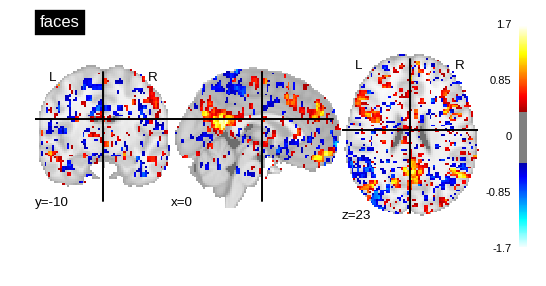

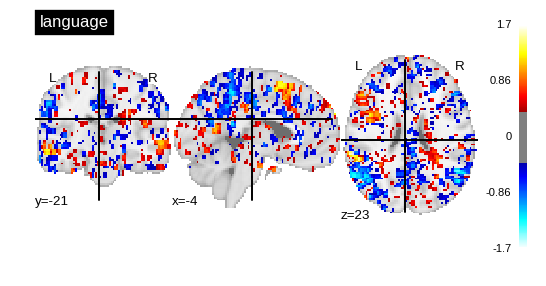

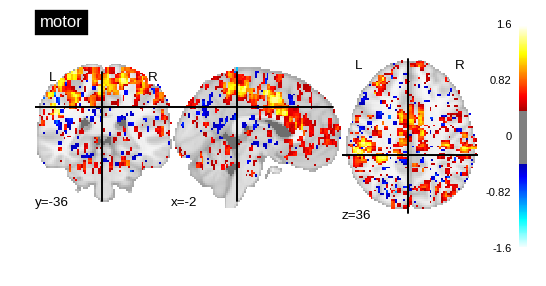

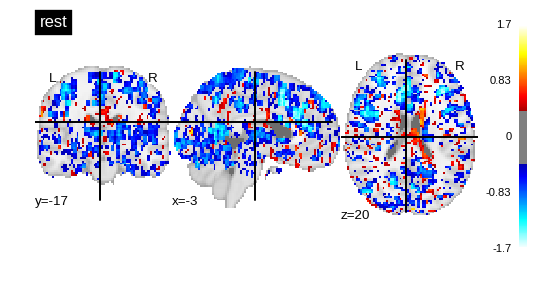

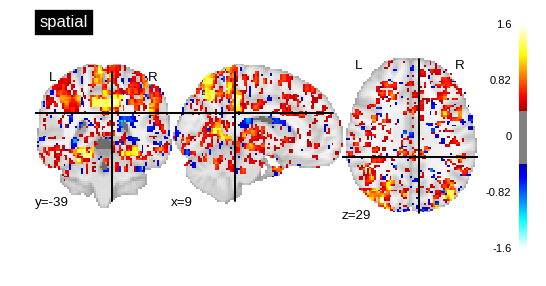

In [12]:
for cond in meanBlockDf.index:
    fig,ax1 = plt.subplots(1,1,figsize=(8,4))
    thisIm = rawMasker.inverse_transform(meanBlockDf.loc[cond])
    thisIm.to_filename('../meanTraining/meanCond_%s.nii.gz'%cond)
    plotting.plot_stat_map(thisIm,title=cond,threshold=0.4,axes=ax1)
    plt.show()

same thing, using smoothing:

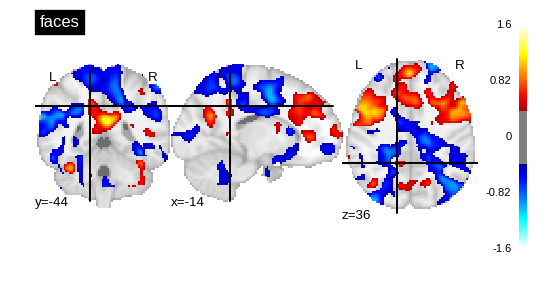

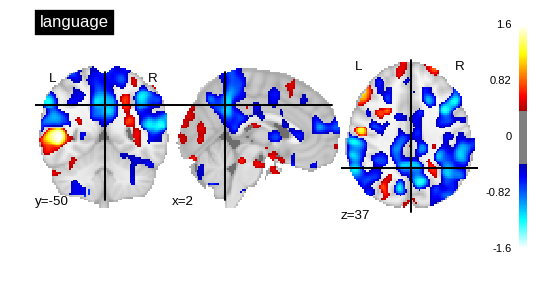

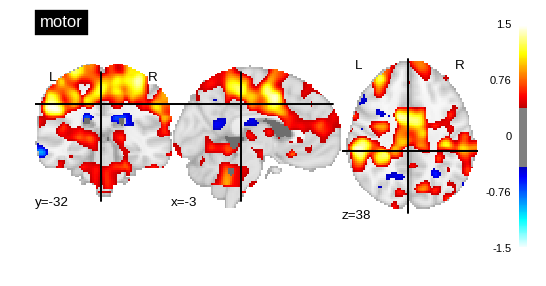

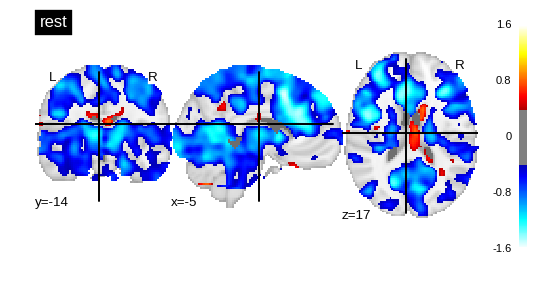

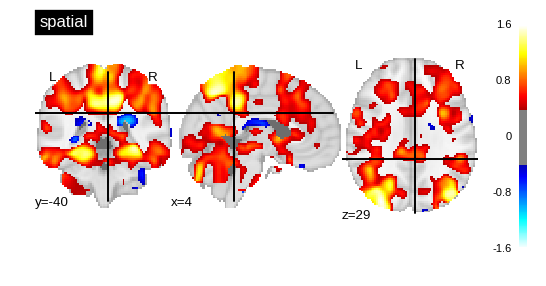

In [13]:
masker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
                                smoothing_fwhm=8).fit()

blockDf = makeBigDf(imgList,masker)
meanBlockDf = blockDf.groupby(level=0).mean()

for cond in meanBlockDf.index:
    fig,ax1 = plt.subplots(1,1,figsize=(8,4))
    thisIm = rawMasker.inverse_transform(meanBlockDf.loc[cond])
    #thisIm.to_filename('../meanTraining/meanCond_%s.nii.gz'%cond)
    plotting.plot_stat_map(thisIm,title=cond,threshold=0.4,axes=ax1)
    plt.show()

## Kreuzvalidierung

In [14]:
# funktion, um unsere Tabelle aufzuteilen
def makeHalfDf(bigDf,start,stop):
    halfDf = pd.DataFrame()
    for cond in bigDf.index.levels[0]:
        thisDf = bigDf.ix[cond]
        thisHalf = thisDf.ix[start:stop]
        thisHalf.index = [[cond]*thisHalf.shape[0],thisHalf.index]
        halfDf = pd.concat([halfDf,thisHalf])
    return halfDf

In [15]:
thisHalfDf = makeHalfDf(blockDf,0,5)

In [16]:
thisHalfDf

0         1         2         3         4       \
faces    004-family       -0.131712 -0.247599 -0.353253 -0.307772 -0.404532   
         007-friends       0.371767  0.506046  0.599997  0.368539  0.507989   
         013-movieactors  -0.152343 -0.027185  0.170426 -0.033490  0.082631   
         016-athletes      0.137424  0.316343  0.406599  0.145615  0.292691   
         024-tvactors     -0.542268 -0.461620 -0.489366 -0.428953 -0.432396   
language 002-animals      -1.304910 -1.352199 -1.561463 -1.101738 -1.211674   
         006-tools        -0.181278 -0.194753 -0.250152 -0.562729 -0.645680   
         012-cities       -0.110286 -0.085790 -0.009411  0.082102  0.110648   
         018-countries    -0.807269 -0.909072 -1.160755 -0.916041 -1.089692   
         021-occupations   0.315692  0.261248  0.111688  0.312304  0.272935   
motor    005-badminton     0.457165  0.412421  0.343751  0.427962  0.407150   
         010-tennis       -0.421331 -0.738155 -1.268423 -0.211983 -0.494813   
         015-swimming     -0.953630 -0.987361 -0.976398 -0.695123 -0.741398   
         020-soccer        0.230191 -0.012018 -0.044856  0.306141  0.043372   
         025-highjump     -0.753493 -0.913023 -1.016237 -0.862291 -0.953295   
rest     001-rest         -0.683957 -0.483070 -0.335974 -0.572091 -0.371510   
         009-rest          0.992906  1.050726  1.232759  0.760918  0.833328   
         014-rest          0.941420  1.197002  1.494081  1.215778  1.424879   
         019-rest          0.748889  0.614106  0.499476  0.697738  0.597522   
         023-rest          0.174240  0.525470  0.834516 -0.038713  0.322663   
spatial  003-citysquare    0.674867  0.640130  0.750818  0.543514  0.565146   
         008-market        0.909795  0.870657  0.923382  0.940560  0.925624   
         011-tramstation   0.104573  0.005542  0.018358 -0.050777 -0.102424   
         017-trainstation  0.258397  0.177841  0.212285  0.205068  0.194259   
         022-school        0.026199  0.095154  0.118094  0.092025  0.151775   

                             5         6         7         8         9       \
faces    004-family       -0.462510 -0.412813 -0.463264 -0.521688  1.202024   
         007-friends       0.121758  0.218807  0.339092 -0.010615  0.343262   
         013-movieactors  -0.061057  0.002701  0.075473 -0.006886 -0.700334   
         016-athletes     -0.003736  0.143327  0.215615  0.120708  0.297415   
         024-tvactors     -0.375577 -0.313545 -0.364312 -0.192050 -1.941564   
language 002-animals      -0.943597 -0.935022 -1.060316 -0.806183 -1.630275   
         006-tools        -0.724644 -0.748628 -0.863239 -0.777973 -0.032094   
         012-cities        0.190163  0.145257  0.196423  0.138026 -0.539170   
         018-countries    -0.821608 -0.859765 -1.061629 -0.700754  0.231347   
         021-occupations   0.344733  0.388243  0.400302  0.501791 -0.179020   
motor    005-badminton     0.548291  0.528222  0.516686  0.715238  0.523261   
         010-tennis       -0.045098 -0.191006 -0.437171 -0.336262 -0.908246   
         015-swimming     -0.531030 -0.604468 -0.686307 -0.649488 -1.868529   
         020-soccer        0.766199  0.436718  0.147130  0.614983 -0.426775   
         025-highjump     -0.852063 -0.874881 -0.891751 -0.832067  0.722965   
rest     001-rest         -0.667935 -0.440524 -0.254682 -0.301380 -0.727144   
         009-rest          0.440681  0.440449  0.507591  0.069409  0.956174   
         014-rest          1.128087  1.238458  1.370167  1.068351  0.508966   
         019-rest          0.641123  0.551897  0.448058  0.319002  1.408948   
         023-rest         -0.545244 -0.226657  0.163926 -0.382920  1.107686   
spatial  003-citysquare    0.611873  0.512846  0.559018  0.601046  0.782939   
         008-market        1.177558  1.043784  1.058794  1.218765  0.570890   
         011-tramstation   0.023565 -0.033328  0.007807  0.119324  0.569153   
         017-trainstation  0.272116  0.232246  0.302685  0.333018 -0.094306   

In [17]:
otherHalfDf = makeHalfDf(blockDf,5,10)

In [18]:
otherHalfDf

0         1         2         3         4       \
faces    029-politicians   1.617108  1.664906  1.694971  1.576399  1.625296   
         033-lectureres    0.779068  0.897846  0.876342  0.647684  0.741406   
         036-teachers     -2.905297 -2.653048 -2.216734 -2.698125 -2.457082   
         042-family        0.719375  0.871569  0.987930  0.827317  1.007745   
         047-friends      -0.689103 -0.757086 -0.804161 -0.691243 -0.779532   
language 028-fruits       -0.443625 -0.704451 -0.966003 -0.524471 -0.805771   
         034-clothing     -0.031708 -0.129109 -0.253946  0.075195 -0.024395   
         039-vegetables   -0.983792 -0.832742 -0.467760 -1.131824 -1.140460   
         044-furniture    -0.382601 -0.428748 -0.549200 -0.475682 -0.559454   
         048-colors       -0.022283 -0.125017 -0.313594 -0.001184 -0.078047   
motor    030-climbing     -0.085333 -0.164170 -0.318882 -0.005960 -0.057452   
         035-huerdlerace  -1.776928 -1.569872 -0.959264 -1.918525 -1.697040   
         040-archery      -0.543745 -0.424275 -0.266463 -0.539495 -0.395017   
         045-ropeskipping  1.187530  1.259464  1.349545  1.165297  1.276137   
         050-juggling      2.735723  2.743378  2.549800  2.801030  2.742280   
rest     027-rest          0.951979  1.066733  1.266902  1.130035  1.253543   
         031-rest          0.756893  0.645402  0.441113  0.504826  0.415479   
         037-rest         -1.419373 -1.357171 -1.288039 -1.403617 -1.327266   
         043-rest         -0.188000 -0.097686 -0.004513 -0.176058 -0.065902   
         046-rest         -0.422121 -0.445839 -0.311742 -0.668977 -0.629925   
spatial  026-church        2.062011  1.953630  1.624492  2.209943  2.094035   
         032-basement     -0.373131 -0.472028 -0.652187 -0.487413 -0.681150   
         038-promenade    -1.497427 -1.832753 -2.325620 -1.331092 -1.525926   
         041-cityofkiel   -1.073658 -0.930643 -0.610876 -1.002337 -0.832520   
         049-univesity     1.727389  1.560871  1.267949  1.801711  1.615818   

                             5         6         7         8         9       \
faces    029-politicians   1.463168  1.534112  1.556402  1.509794  2.239539   
         033-lectureres    0.520927  0.658039  0.732142  0.760603 -0.254466   
         036-teachers     -2.670334 -2.519461 -2.327986 -2.308599 -1.788939   
         042-family        0.737468  0.883627  1.060609  0.868405  0.650421   
         047-friends      -0.473524 -0.651694 -0.779027 -0.612954 -0.540745   
language 028-fruits       -0.356212 -0.493340 -0.762011 -0.381677 -0.455940   
         034-clothing      0.321723  0.245134  0.147542  0.457253 -0.042031   
         039-vegetables   -1.212168 -1.273150 -1.318907 -1.364316  1.335171   
         044-furniture    -0.465442 -0.473233 -0.511205 -0.489012 -0.070174   
         048-colors        0.052019 -0.005534 -0.110599 -0.006050  0.112573   
motor    030-climbing      0.066063  0.034939  0.056572  0.051189  0.283713   
         035-huerdlerace  -2.028191 -2.051162 -1.912582 -2.091542  0.405905   
         040-archery      -0.522938 -0.540686 -0.426779 -0.580337  0.469670   
         045-ropeskipping  1.044066  1.152267  1.279659  1.198578  1.710442   
         050-juggling      2.797173  2.888973  2.817410  3.027370  1.126281   
rest     027-rest          1.165442  1.252147  1.392457  1.323889  0.844851   
         031-rest          0.332836  0.268117  0.120715 -0.023537  1.083611   
         037-rest         -1.384628 -1.348746 -1.244304 -1.256531 -1.752616   
         043-rest         -0.306800 -0.209434 -0.030866 -0.251447  0.098981   
         046-rest         -0.904623 -0.952156 -0.914826 -1.254198 -1.269413   
spatial  026-church        2.200462  2.167859  2.068509  1.978162 -0.408643   
         032-basement     -0.349935 -0.485804 -0.718945 -0.416073 -0.600012   
         038-promenade    -1.217441 -1.238553 -1.311854 -1.229367 -2.304770   
         041-cityofkiel   -1.064420 -1.029342 -0.875178 -1.090458 -1.211401   

In [19]:
thisHalfMeanDf = thisHalfDf.groupby(level=0).mean()

In [20]:
thisHalfMeanDf

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
faces,-0.063426,0.017197,0.066881,-0.051212,0.009277,-0.156224,-0.072305,-0.039479,-0.122106,-0.159839,...,0.030357,-0.094052,-0.161372,-0.388136,-0.557269,-0.632053,-0.035381,-0.235583,-0.396791,-0.170171
language,-0.417610,-0.456113,-0.574019,-0.437220,-0.512692,-0.390990,-0.401983,-0.477692,-0.329018,-0.429843,...,-0.402457,-0.414083,-0.407404,-0.305384,-0.291424,-0.333338,-0.597300,-0.484837,-0.447769,-0.480539
motor,-0.288219,-0.447627,-0.592433,-0.207059,-0.347797,-0.022740,-0.141083,-0.270283,-0.097519,-0.391465,...,-0.085669,0.072339,-0.857447,-0.791333,-0.684304,-0.604844,-0.513298,-0.455741,-0.371999,-0.063286
rest,0.434700,0.580847,0.744972,0.412726,0.561376,0.199342,0.312725,0.447012,0.154493,0.650926,...,0.116504,-0.044478,0.404582,0.510696,0.584279,0.623877,0.150461,0.154153,0.167281,-0.331805
spatial,0.394766,0.357865,0.404588,0.346078,0.346876,0.442403,0.372242,0.407587,0.470593,0.393336,...,0.313954,0.470208,0.954542,0.871759,0.837357,0.846891,0.972255,0.970163,0.977435,1.026946


In [21]:
otherHalfMeanDf = otherHalfDf.groupby(level=0).mean()

In [22]:
otherHalfMeanDf

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
faces,-0.095770,0.004837,0.107669,-0.067594,0.027567,-0.084459,-0.019075,0.048428,0.043450,0.061162,...,-0.268802,-0.246143,0.280794,0.142560,0.076882,0.060811,0.455663,0.290857,0.185298,0.338393
language,-0.372802,-0.444013,-0.510101,-0.411593,-0.521625,-0.332016,-0.400024,-0.511036,-0.356760,0.175920,...,-0.369104,-0.333267,-0.407137,0.128339,0.400052,0.451172,-0.460004,0.005232,0.251911,0.001068
motor,0.303449,0.368905,0.470947,0.300469,0.373782,0.271235,0.296866,0.362856,0.321052,0.799202,...,0.546620,0.699165,0.207468,-0.034065,-0.091961,-0.052470,0.274535,0.085297,0.054670,0.204797
rest,-0.064124,-0.037712,0.020744,-0.122758,-0.070814,-0.219555,-0.198014,-0.135365,-0.292365,-0.198917,...,-0.201171,-0.401726,0.263327,0.345718,0.311897,0.242870,0.004450,0.036402,-0.022365,-0.262209
spatial,0.169037,0.055815,-0.139248,0.238162,0.134051,0.293005,0.250652,0.167972,0.208182,-0.900482,...,0.319769,0.292036,-0.277353,-0.480154,-0.585509,-0.602916,-0.251380,-0.365943,-0.397672,-0.263195


In [23]:
coords = [(0,-40,0),(-12,-40,60),(8,-60,-20),(0,0,0),(-50,-50,10)]

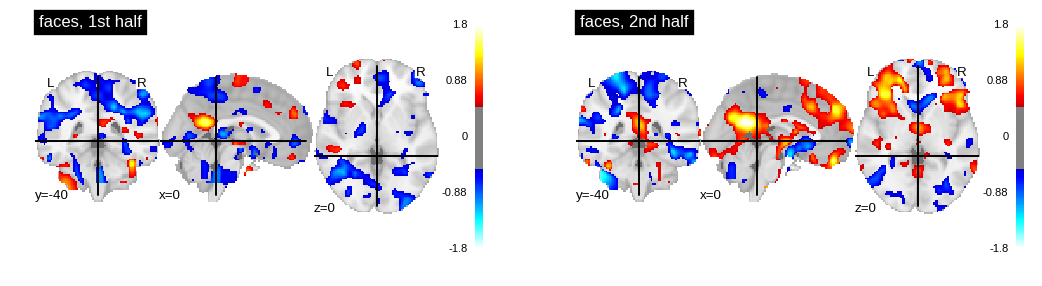

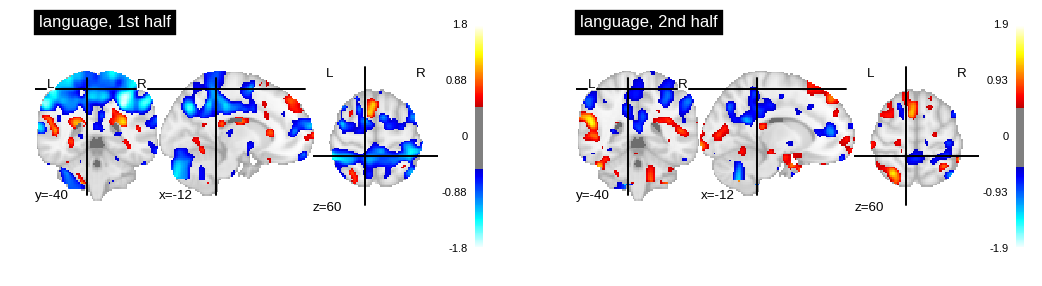

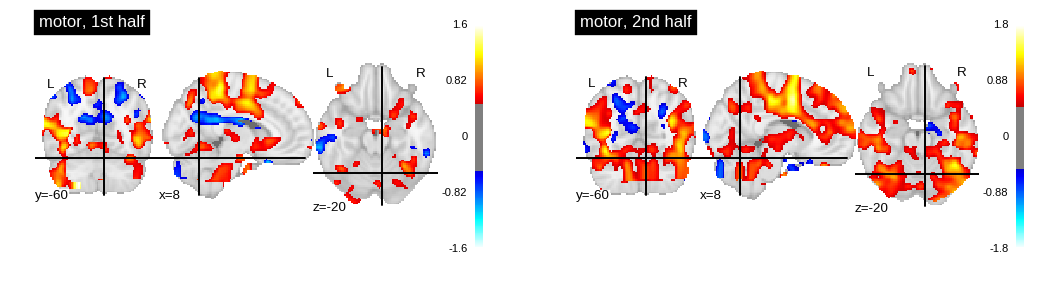

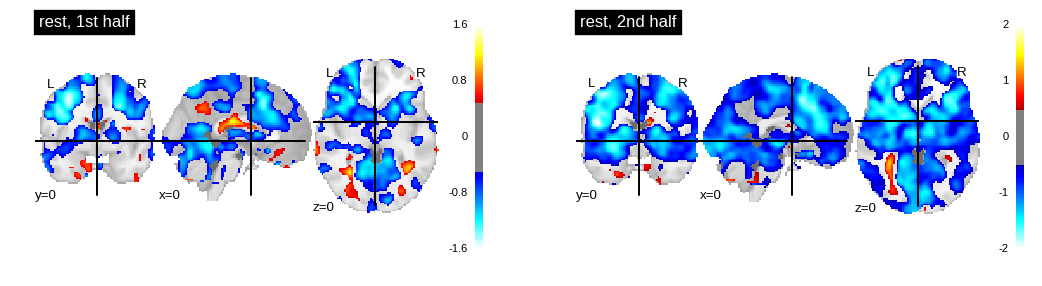

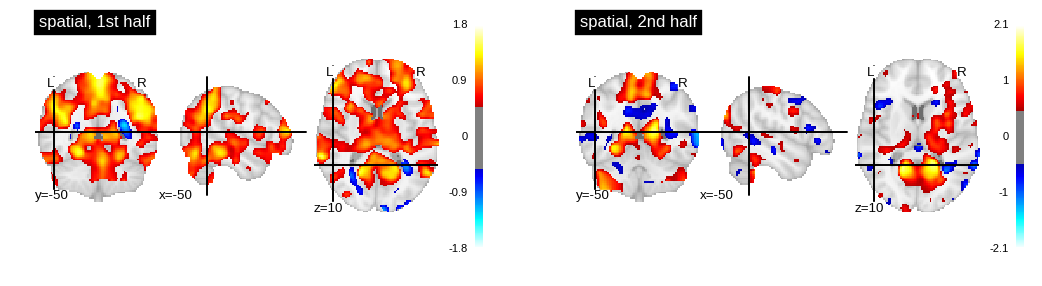

In [24]:
for cond,coord in zip(thisHalfMeanDf.index,coords):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
    thisA = masker.inverse_transform(thisHalfMeanDf.ix[cond])
    thisB = masker.inverse_transform(otherHalfMeanDf.ix[cond])
    display = plotting.plot_stat_map(thisA,title='%s, 1st half'%cond,threshold=0.5,axes=ax1,cut_coords=coord)
    plotting.plot_stat_map(thisB,title='%s, 2nd half'%cond,threshold=0.5,axes=ax2,cut_coords=display.cut_coords)
    plt.show()

In [25]:
def makeCorrs(thisHalfDf,otherHalfDf,thisHalfMeanDf,otherHalfMeanDf):
    
    thisCorrDf = pd.DataFrame(np.corrcoef(otherHalfMeanDf,thisHalfDf)[5:,:5],
                        index=thisHalfDf.index,
                        columns=otherHalfMeanDf.index)
    
    otherCorrDf = pd.DataFrame(np.corrcoef(thisHalfMeanDf,otherHalfDf)[5:,:5],
                        index=otherHalfDf.index,
                        columns=thisHalfMeanDf.index)
    
    mergeDf = pd.concat([thisCorrDf,otherCorrDf])
    mergeDf.sort_index(inplace=True)
    return mergeDf

In [26]:
myCorrDf = makeCorrs(thisHalfDf,otherHalfDf,thisHalfMeanDf,otherHalfMeanDf)

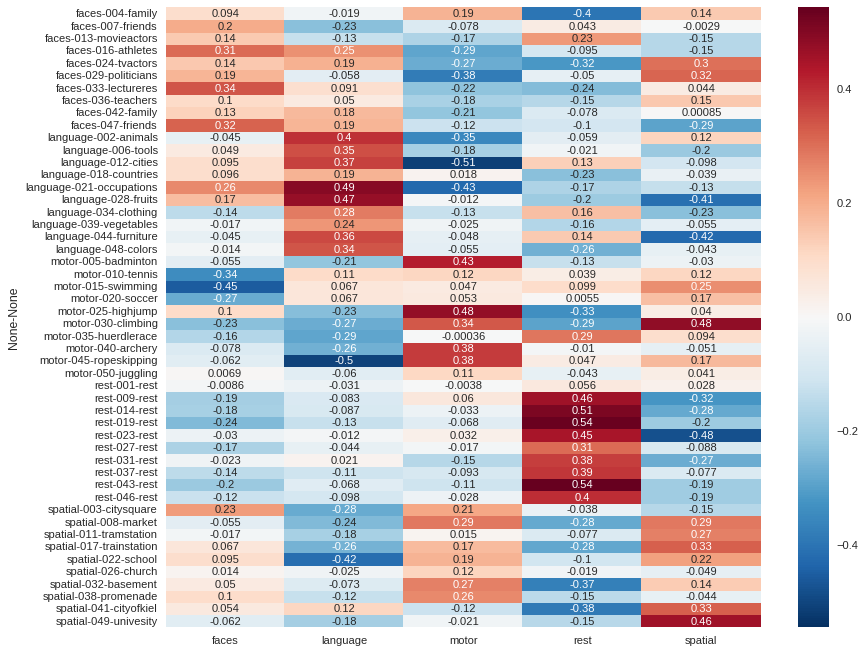

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(myCorrDf,annot=True)
plt.show()

### Entscheidungsregel (winner takes all)

In [28]:
def makeCorrPred(myCorrDf):
    d = {}
    # wir gehen durch jede Zeile
    for cond,num in myCorrDf.index:
        # wir wählen diese Zeile aus
        thisDf = myCorrDf.ix[cond].ix[num]
        # wir wählen die Spalte mit dem höhsten Wert aus
        winner = thisDf.idxmax()
        # wir schreiben einen eintrag mit folgenden infos:
        # real : die tatsächliche bedingung (aus der zeile)
        # winner: die spalte mit der höchsten korrelation
        # hit: wir fragen, ob real und winner identisch sind (kann wahr oder falsch sein)
        d[num] = {'real':cond, 'winner':winner,'hit':cond==winner  }
        
    # wir packen das ganze in eine tabelle, die wir nett formatieregn
    predDf = pd.DataFrame(d).T

    # wir rechnen aus, in wie viel prozent der Fälle wir richig lagen
    percentCorrect = np.mean( [int(x) for x in predDf['hit']] )*100
    
    return predDf,percentCorrect

In [29]:
corrPredDf,corrPcCorrect = makeCorrPred(myCorrDf)

In [30]:
corrPredDf

,hit,real,winner
001-rest,True,rest,rest
002-animals,True,language,language
003-citysquare,False,spatial,faces
004-family,False,faces,motor
005-badminton,True,motor,motor
006-tools,True,language,language
007-friends,True,faces,faces
008-market,True,spatial,spatial
009-rest,True,rest,rest
010-tennis,True,motor,motor


In [31]:
def makeConfusion(corrDf):
    d = {}
    for i in corrDf.index:
        correct = i[0]
        predicted = corrDf.loc[i].idxmax()
        try:
            d[correct].append(predicted)
        except:
            d[correct] = [predicted]
    df = pd.DataFrame(d)
    
    d = {}
    for true in df.columns:
        d[true] = {}
        for pred in df.columns:
            d[true][pred] = (df[true]==pred).mean()

    confDf = pd.DataFrame(d).T
    confDf.index= [['True']*len(confDf.index),confDf.index]

    confDf.columns= [['Predicted']*len(confDf.columns),confDf.columns]
    return confDf*100

In [32]:
confDf = makeConfusion(myCorrDf)

In [33]:
confDf

Predicted                              
                  faces language motor   rest spatial
True faces         40.0     10.0  10.0   10.0    30.0
     language       0.0    100.0   0.0    0.0     0.0
     motor          0.0      0.0  60.0   10.0    30.0
     rest           0.0      0.0   0.0  100.0     0.0
     spatial       10.0      0.0  30.0    0.0    60.0

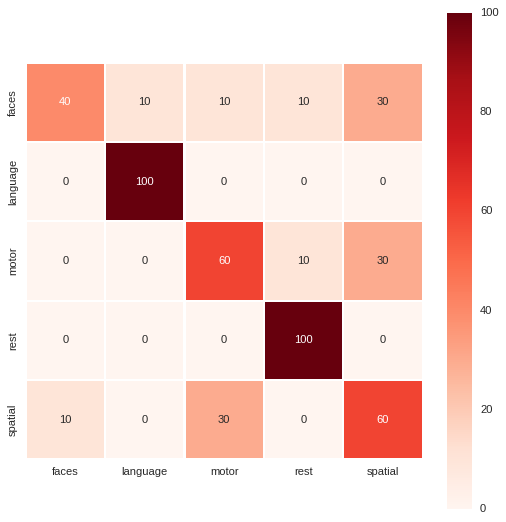

In [34]:
fig,ax = plt.subplots(1,1,figsize=(8,8))

sns.heatmap(confDf.loc['True']['Predicted'].astype(int),
            square=True,cmap=('Reds'),vmin=0,vmax=100,fmt='.3g',
            linewidths=1,annot=True,ax=ax )
plt.show()

In [35]:
print "%i%% correct predictions!" % corrPcCorrect

72% correct predictions!


## Maskieren von Daten

In [36]:
def makeMasks(meanDf,pc):
    roiDict = {}
    # wir machen uns eine Kopie unserer gemittelten Aktivierngstabelle,
    # damit wir sie beabeiten können
    copyDf = meanDf.copy()
    # für jede Bedingung
    for cond in copyDf.index:
        # wir wählen die Bedingung aus
        thisCond = copyDf.ix[cond]
        # wir schauen, welcher Wert einem vordefinierten Percentil entspricht
        # merke: Percentil 84 würde z.B. bedeuten, dass der Wert höher ist als
        # von 84% der restlichen Voxel
        thisPercentile = np.percentile(thisCond,pc)
        # wir sagen, dass alles was dadrunter fällt zu Null wird
        thisCond[thisCond<thisPercentile]=0
        # wir sagen, dass alles was nicht zu Null geworden ist 
        # (also über dem Percentil lag), zu eins wird
        thisCond[thisCond>0] = 1
        # wir haben eine binäre Make (0 und 1 ) und fügen sie unserer Liste
        # mit Masken (eine pro Bedingung) hinzu
        roiDict[cond] = thisCond
    
    # wenn wir fertig sind, machen wird daraus eine Tabelle
    roiDf = pd.DataFrame(roiDict).T
    # Ausgabe der Tabelle
    return roiDf

Beispiel: alles was unter Percentil 90 fällt, wird zu Null; alles darüber wird zu Eins

In [37]:
roiDf = makeMasks(thisHalfMeanDf,90)

Wir sehen viele Nullen:

In [38]:
roiDf

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
faces,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
language,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
motor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rest,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
spatial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Visualisierung der Karten und der aus ihnen erstellen Masken

In [39]:
def plotRois(roiDf,meanDf):
    for cond in roiDf.index:
        fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

        thisOrigImg = masker.inverse_transform(meanDf.ix[cond])
        thisMaskImg = masker.inverse_transform(roiDf.ix[cond])

        display = plotting.plot_stat_map(thisOrigImg,threshold=0.0,axes=ax1,title=cond)
        plotting.plot_roi(thisMaskImg,title=cond,cut_coords=display.cut_coords,axes=ax2)

        plt.show()

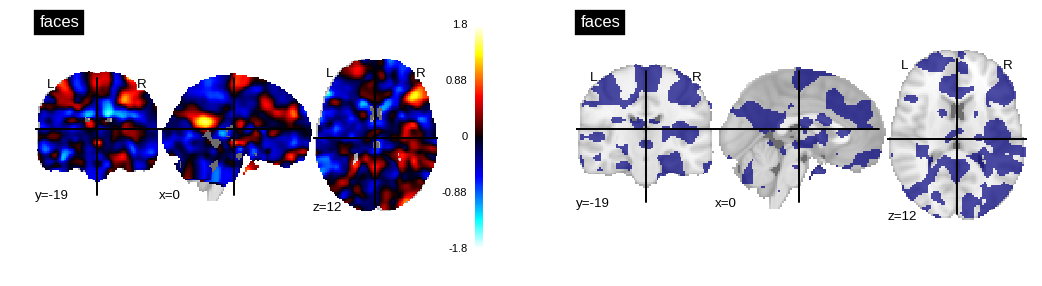

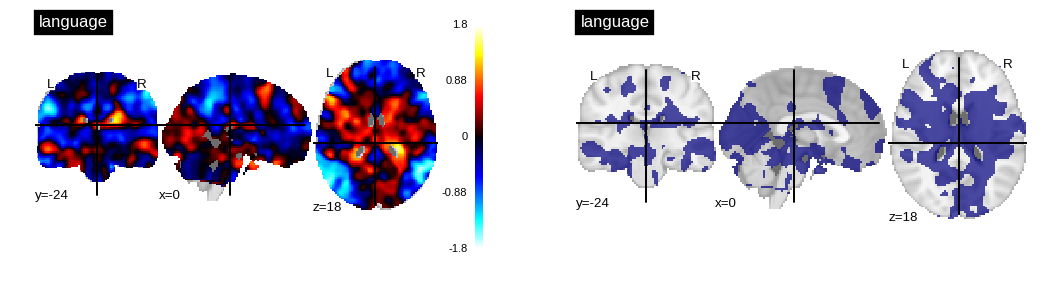

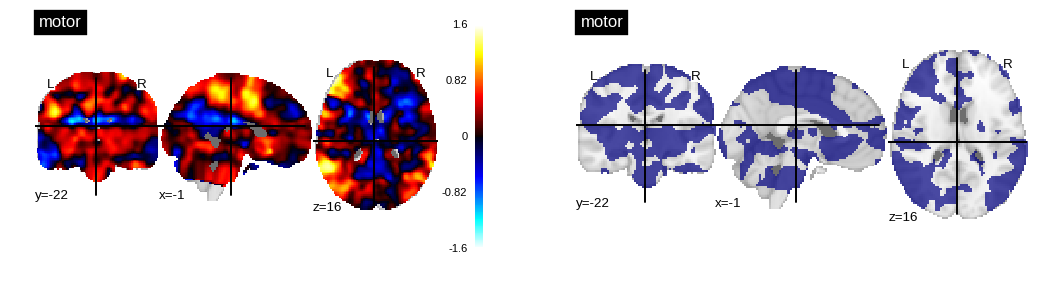

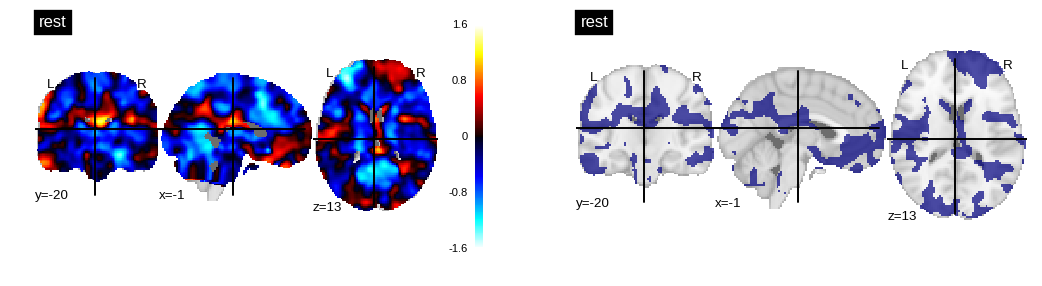

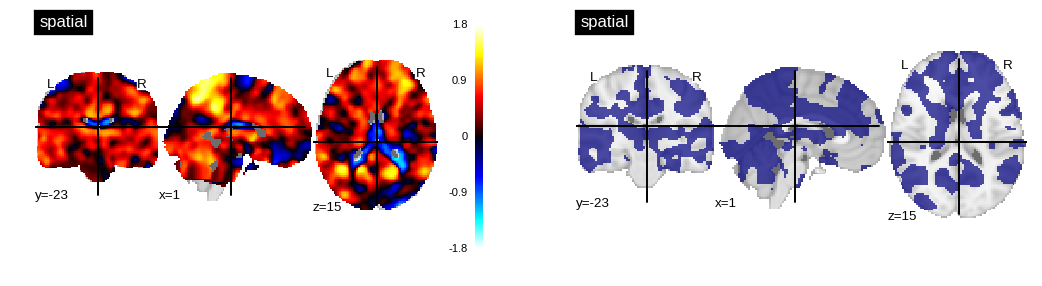

In [40]:
roiDf = makeMasks(thisHalfMeanDf,50)
plotRois(roiDf,thisHalfMeanDf)

### Das Gleiche für Percentil 99

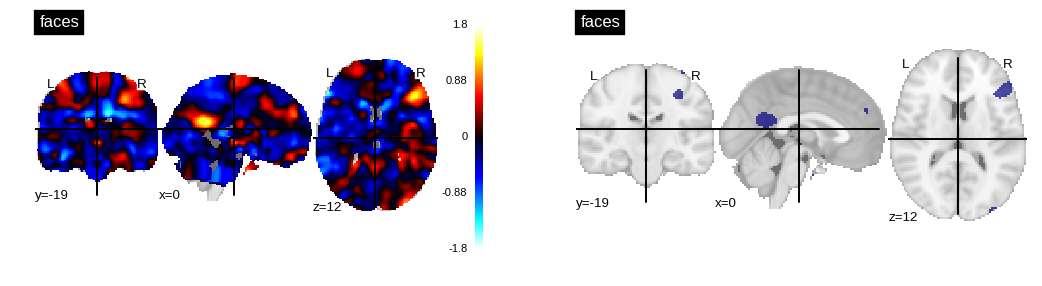

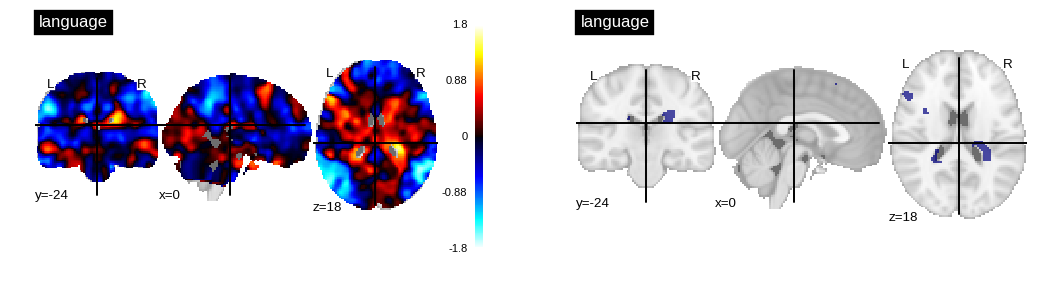

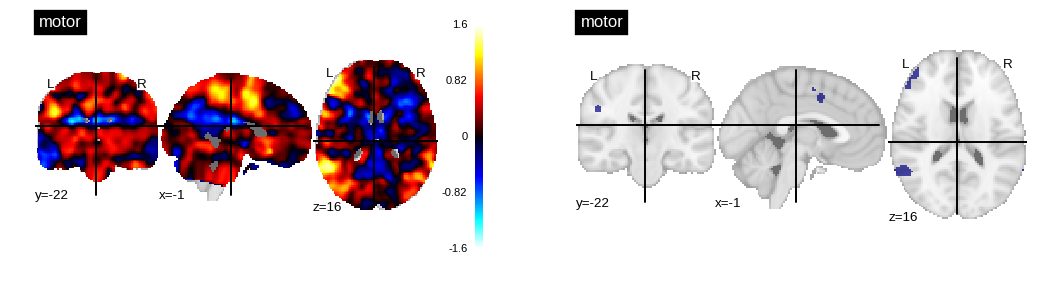

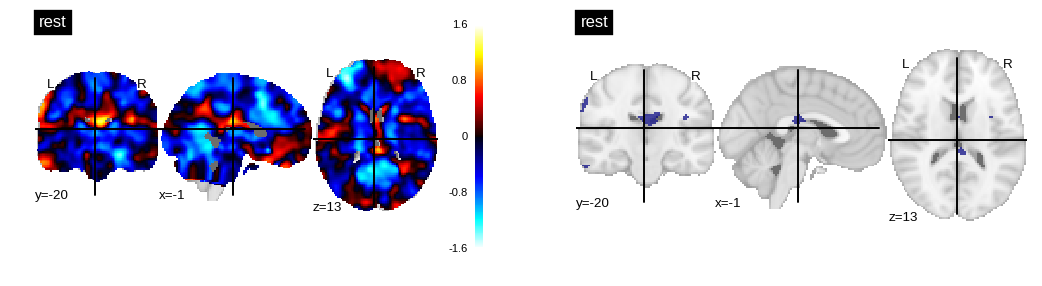

/data/martin/seminarSS17/venv/lib/python2.7/site-packages/numpy/ma/core.py:2778: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


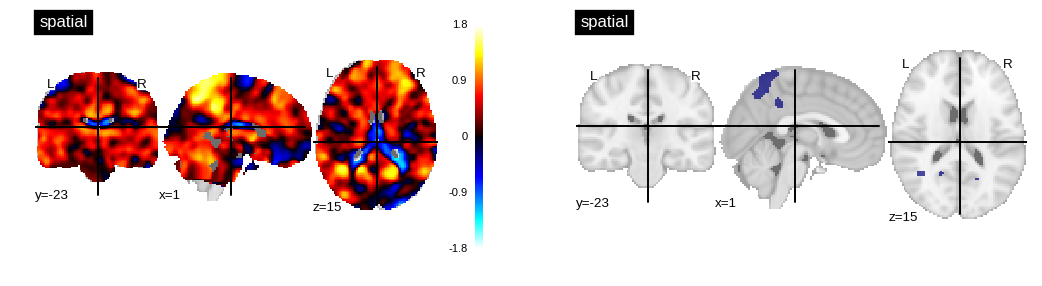

In [41]:
roiDf = makeMasks(thisHalfMeanDf,99)
plotRois(roiDf,thisHalfMeanDf)

### Wir machen daraus eine Maske  

Das heißt, wir nehmen die Voxel die in mindestens einer der 5 Masken vorkommen (also die inklusive Diskunktion im Sinne von „(A oder B) und (A und B)“

In [42]:
def mergeRois(roiDf):
    copyDf = roiDf.copy()
    #wir summieren die 5 Masken auf, jetzt können wir für jeden
    # Voxel Werte zwischen Null und Fünf haben (0: keine der Masken
    # enthält das Voxel, 5: alle Masken enthalten das Voxel)
    sumDf = pd.DataFrame( copyDf.sum(axis=0) )
    # uns interessieren alle Voxel mit Werten größer Null (also: mindestens
    # eine der Masken enthält das Voxel)
    sumDf[sumDf>0] = 1
    sumDf[sumDf<1] = 0
    return sumDf.T

In [43]:
thisBigRoi = mergeRois(roiDf)

In [44]:
thisBigRoiImg = masker.inverse_transform(thisBigRoi.values)

Schauen wir uns das Ergebnis an:  
- links sehen wir die Maske
- rechts sehen wird die einzelnen Masken farbkodiert

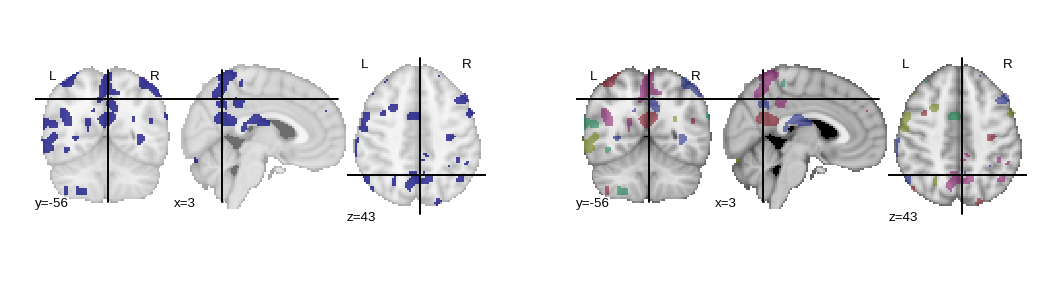

In [45]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
display = plotting.plot_roi(thisBigRoiImg,axes=ax1);
plotting.plot_prob_atlas( masker.inverse_transform(np.array(roiDf)),cut_coords=display.cut_coords,axes=ax2 )
plt.show()

### Maske anwenden

Wir verwenden jetzt die Maske zum maskieren, indem wir ein Objekt "roiMasker" erstellen, welches bei der Extraktion der Daten aus den Hirnbildern nur Voxel unserer Maske berücksichtigt.

In [73]:
roiMasker = input_data.NiftiMasker(mask_img=thisBigRoiImg,smoothing_fwhm=0).fit()

In [74]:
roiMasker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f2719d61c90>,
      mask_strategy='background', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=0,
      standardize=False, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

Zum Vergleich: die alte "whole-brain" Maske links und unsere sehr spartanische "Klecks-Maske" rechts:  

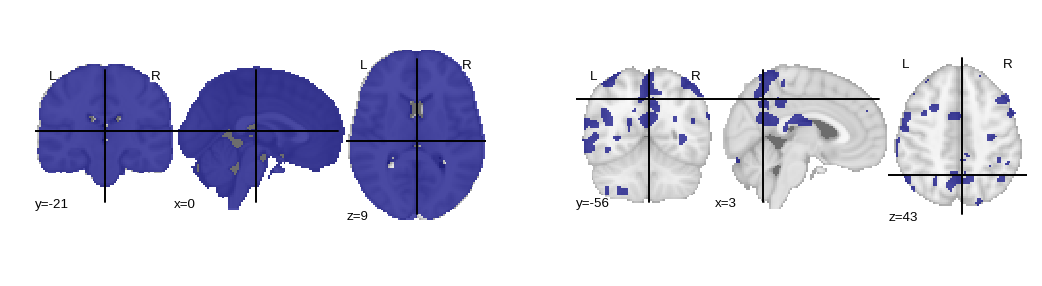

In [75]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
plotting.plot_roi(masker.mask_img_,axes=ax1)
plotting.plot_roi(roiMasker.mask_img_,axes=ax2)
plt.show()

## Training

In [100]:
def makeMasker(voxelPc,smoo,start,stop,imgList=imgList,masker=masker):
    # die whole-brain daten erstellen
    blockDf = makeBigDf(imgList,masker)
    # die trainingsdaten auswählen
    thisHalfDf = makeHalfDf(blockDf,start,stop)
    thisHalfMeanDf = thisHalfDf.groupby(level=0).mean()
    # masken aus der Mittelung der ersten Hälfte erstellen
    roiDf = makeMasks(thisHalfMeanDf,voxelPc)
    # masken zusammenführen
    thisBigRoi = mergeRois(roiDf)
    # masken zu bildern machen
    thisBigRoiImg = masker.inverse_transform(thisBigRoi.values)
    # masker-objekt erstellen
    roiMasker = input_data.NiftiMasker(mask_img=thisBigRoiImg,smoothing_fwhm=smoo).fit()
    
    return roiMasker

In [101]:
roiMasker = makeMasker(0,0,0,5)

In [102]:
roiMasker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f2714f62b90>,
      mask_strategy='background', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=0,
      standardize=False, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

In [104]:
def makeEverything(voxelPc,smoo,imgList=imgList,masker=masker):
    
    # define feature space through first half
    thisRoiMasker = makeMasker(voxelPc,smoo,0,5)
    # exctract data using features selected based on first half
    thisBlockMaskDf = makeBigDf(imgList,thisRoiMasker)
    # get the average of first half
    thisHalfMeanMaskDf = makeHalfDf(thisBlockMaskDf,0,5).groupby(level=0).mean()
    # get the single blocks of the second half from the features space defined by the first half
    otherHalfMaskDf = makeHalfDf(thisBlockMaskDf,5,10)

    # define the feature space through second half
    otherRoiMasker = makeMasker(voxelPc,smoo,5,10)
    # extract data using feataures selected based on second half
    otherBlockMaskDf = makeBigDf(imgList,otherRoiMasker)
    # get the average of second half
    otherHalfMeanMaskDf = makeHalfDf(otherBlockMaskDf,5,10).groupby(level=0).mean()
    # get the single block of first half...
    thisHalfMaskDf = makeHalfDf(otherBlockMaskDf,0,5)

    # correlate    
    myCorrDf = makeCorrs(thisHalfMaskDf,otherHalfMaskDf,thisHalfMeanMaskDf,otherHalfMeanMaskDf)

    # predict
    corrPredDf,corrPcCorrect = makeCorrPred(myCorrDf)
    
    return myCorrDf,corrPredDf,corrPcCorrect

In [105]:
########### hier Werte eingeben ###########
pc = 99 # percentil (zwischen 0 und 100)
smoo = 0 # glättung (ab 0)
###########################################

myCorrDf,corrPredDf,corrPcCorrect = makeEverything(pc,smoo)

In [106]:
myOrder = ['language','motor','spatial','faces','rest']
myCorrDf = myCorrDf.reindex(myOrder,level=0)
myCorrDf = myCorrDf[myOrder]

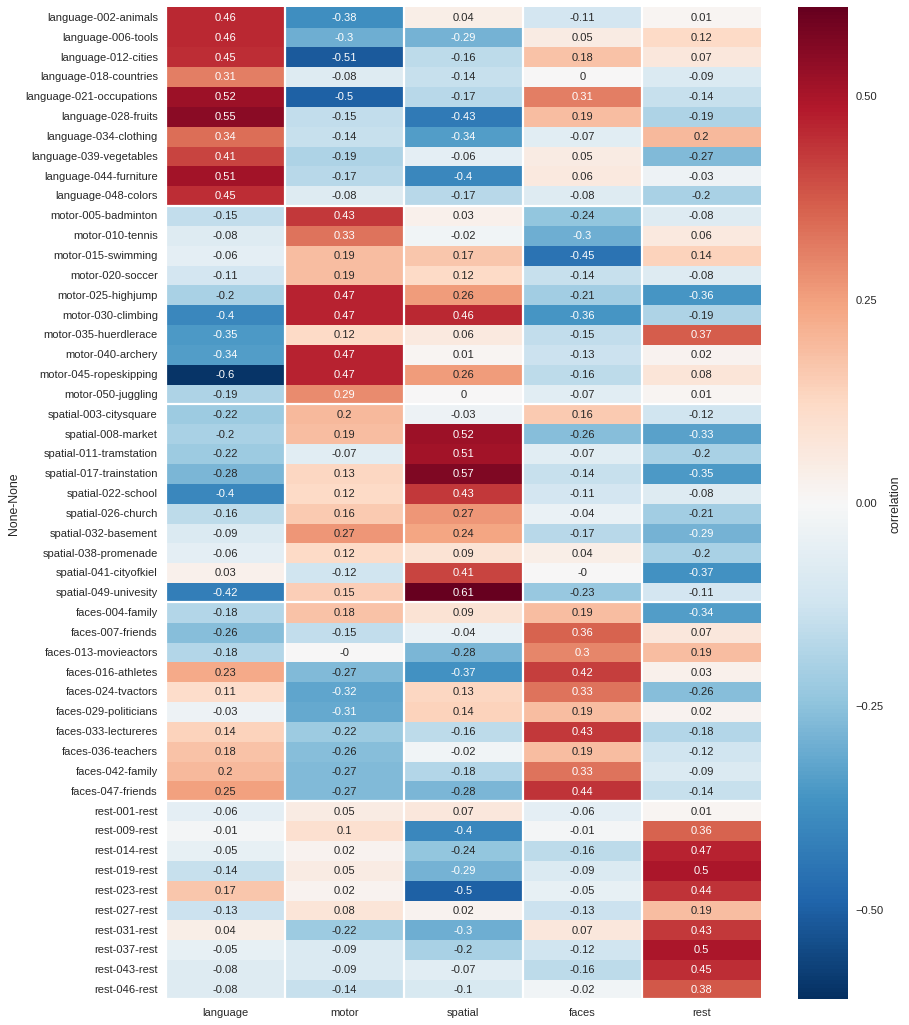

In [107]:
plt.figure(figsize=(12,16))
sns.heatmap(myCorrDf.round(2),annot=True,
            cbar_kws={"label": "correlation"} ) 
for i in range(0,50,10):
    plt.axhline(i,c='white',linewidth=2)
for i in range(0,5,1):
    plt.axvline(i,c='white',linewidth=2)
plt.savefig('../figs/trainHeat.png',dpi=300,bbox_inches='tight')
plt.show()

In [108]:
corrPredDf,corrPcCorrect = makeCorrPred(myCorrDf)
corrPredDf

,hit,real,winner
001-rest,False,rest,spatial
002-animals,True,language,language
003-citysquare,False,spatial,motor
004-family,True,faces,faces
005-badminton,True,motor,motor
006-tools,True,language,language
007-friends,True,faces,faces
008-market,True,spatial,spatial
009-rest,True,rest,rest
010-tennis,True,motor,motor


In [109]:
print "now we reach %i%% correct predictions!" % corrPcCorrect

now we reach 90% correct predictions!


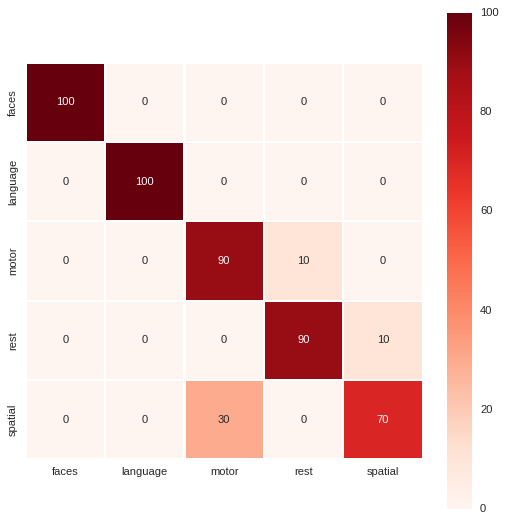

In [110]:
confDf = makeConfusion(myCorrDf)

fig,ax = plt.subplots(1,1,figsize=(8,8))

sns.heatmap(confDf.loc['True']['Predicted'].astype(int),
            square=True,cmap=('Reds'),vmin=0,vmax=100,fmt='.3g',
            linewidths=1,annot=True,ax=ax )
plt.show()

In [94]:
def makeAccMap(imgList,masker):
    d = {}
    for pc in range(80,100):
        #print pc
        d[pc] = {}
        for smoo in range(0,20):
            #print smoo
            d[pc][smoo]=makeEverything(pc,smoo,imgList=imgList,masker=masker)
            
    featureDf = pd.DataFrame(d)
    
    featureDf.index=[['smoo']*featureDf.shape[0],featureDf.index]
    featureDf.columns=[['voxel']*featureDf.shape[1],featureDf.columns]
    featureDf.sort_index(axis=0,inplace=True)
    featureDf.sort_index(axis=1,inplace=True)
    
    return featureDf

In [95]:
from datetime import datetime

In [96]:
#print datetime.now()
#featureDf = makeAccMap(imgList,masker)
#featureDf.to_csv('../tables/featureDfTraining.csv')
#print datetime.now()

In [97]:
featureDf = pd.read_csv('../tables/featureDfTraining.csv',index_col=[0,1],header=[0,1])

In [98]:
featureDf.T

smoo                                                  \
Unnamed: 1_level_2    0     1     2     3     4     5     6     7     8    
voxel 80            76.0  74.0  74.0  74.0  74.0  74.0  72.0  72.0  72.0   
      81            76.0  76.0  74.0  74.0  74.0  74.0  72.0  72.0  72.0   
      82            76.0  76.0  74.0  74.0  74.0  74.0  72.0  72.0  72.0   
      83            76.0  76.0  76.0  74.0  74.0  74.0  72.0  72.0  72.0   
      84            76.0  76.0  76.0  76.0  76.0  74.0  72.0  72.0  72.0   
      85            76.0  76.0  76.0  76.0  76.0  76.0  74.0  72.0  72.0   
      86            76.0  76.0  76.0  76.0  76.0  76.0  76.0  74.0  74.0   
      87            76.0  76.0  76.0  76.0  76.0  76.0  76.0  76.0  76.0   
      88            76.0  76.0  76.0  76.0  76.0  76.0  78.0  76.0  76.0   
      89            76.0  76.0  76.0  76.0  76.0  76.0  78.0  74.0  74.0   
      90            76.0  76.0  76.0  76.0  76.0  78.0  78.0  74.0  74.0   
      91            76.0  76.0  76.0  76.0  80.0  80.0  78.0  76.0  74.0   
      92            76.0  78.0  80.0  78.0  80.0  80.0  78.0  76.0  78.0   
      93            80.0  80.0  80.0  82.0  82.0  80.0  82.0  82.0  80.0   
      94            80.0  80.0  80.0  84.0  86.0  86.0  86.0  84.0  84.0   
      95            84.0  82.0  84.0  88.0  88.0  88.0  88.0  84.0  84.0   
      96            84.0  84.0  86.0  88.0  88.0  88.0  88.0  86.0  84.0   
      97            86.0  86.0  88.0  88.0  88.0  88.0  88.0  86.0  86.0   
      98            88.0  88.0  88.0  88.0  88.0  88.0  88.0  86.0  86.0   
      99            90.0  90.0  90.0  90.0  90.0  90.0  90.0  88.0  86.0   

                                                                          \
Unnamed: 1_level_2    9     10    11    12    13    14    15    16    17   
voxel 80            72.0  72.0  72.0  74.0  74.0  74.0  74.0  74.0  72.0   
      81            72.0  72.0  74.0  74.0  74.0  74.0  74.0  74.0  72.0   
      82            72.0  72.0  74.0  74.0  74.0  74.0  74.0  74.0  72.0   
      83            72.0  74.0  74.0  74.0  74.0  74.0  74.0  74.0  72.0   
      84            74.0  74.0  74.0  74.0  74.0  74.0  74.0  74.0  74.0   
      85            74.0  74.0  74.0  74.0  74.0  74.0  74.0  76.0  74.0   
      86            74.0  74.0  74.0  74.0  74.0  76.0  76.0  76.0  74.0   
      87            76.0  74.0  74.0  76.0  76.0  76.0  76.0  76.0  76.0   
      88            76.0  76.0  76.0  76.0  76.0  76.0  76.0  76.0  76.0   
      89            74.0  74.0  76.0  76.0  76.0  76.0  76.0  76.0  76.0   
      90            74.0  74.0  74.0  78.0  78.0  78.0  78.0  78.0  78.0   
      91            74.0  76.0  76.0  78.0  78.0  78.0  78.0  78.0  78.0   
      92            78.0  78.0  78.0  78.0  80.0  78.0  78.0  80.0  80.0   
      93            80.0  80.0  78.0  78.0  78.0  80.0  80.0  80.0  80.0   
      94            84.0  82.0  80.0  80.0  80.0  78.0  78.0  80.0  80.0   
      95            84.0  84.0  84.0  82.0  80.0  78.0  78.0  78.0  80.0   
      96            84.0  84.0  84.0  84.0  82.0  80.0  78.0  78.0  78.0   
      97            84.0  84.0  84.0  84.0  84.0  80.0  80.0  80.0  80.0   
      98            86.0  86.0  84.0  84.0  84.0  82.0  82.0  80.0  80.0   
      99            86.0  86.0  86.0  86.0  86.0  84.0  84.0  82.0  82.0   

                                
Unnamed: 1_level_2    18    19  
voxel 80            68.0  66.0  
      81            70.0  66.0  
      82            70.0  70.0  
      83            72.0  70.0  
      84            74.0  70.0  
      85            74.0  70.0  
      86            74.0  72.0  
      87            74.0  74.0  
      88            74.0  72.0  
      89            74.0  72.0  
      90            74.0  72.0  
      91            78.0  74.0  
      92            80.0  76.0  
      93            80.0  78.0  
      94            80.0  78.0  
      95            80.0  78.0  
      96            78.0  80.0  
      97            80.0  78.0  
      98      

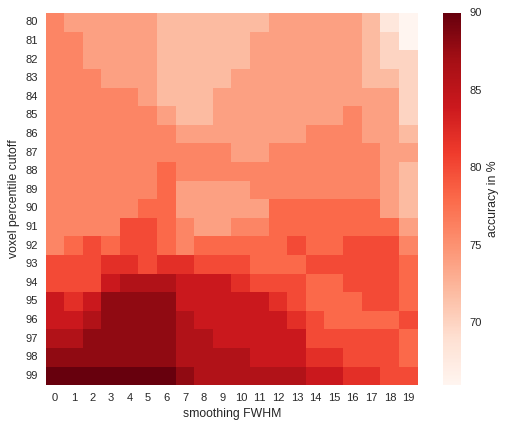

In [99]:
thisMap = featureDf.T.loc['voxel']['smoo']

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(thisMap,square=True,cmap='Reds',axes=ax)
ax.set_yticklabels(thisMap.index[::-1],rotation=360)
ax.set_ylabel('voxel percentile cutoff')
ax.set_xlabel('smoothing FWHM')
#ax.set_title('Accuracy Map')
cbar = ax.collections[0].colorbar
cbar.set_label('accuracy in %')

plt.savefig('../figs/featureSelection.png',dpi=300,bbox_inches='tight')

plt.show()